# Clayton Lima
## Case vaga de Analytics Engineer

### Contexto:

A partir de uma base de dados com um histórico de informações sobre atrasos de voos em aeroportos americanos, pedimos que responda às perguntas abaixo:



### Perguntas:

1. Faça pelo menos 3 testes de consistência de dados da base e explique os resultados.

2. Dentre os motivos que geram atrasos, qual o principal?

3. Quais os aeroportos que mais sofrem com as condições climáticas? Este efeito é sazonal?

4. Qual o pior ano (da base) em termos de atrasos? Dentre os motivos geradores de atrasos, houve algum que se destacou?

5. Devido ao tipo de operação das companhias aéreas, quando há atraso em um voo, isso acaba impactando os voos seguintes.

Dessa forma, um único problema de atraso de aeronave pode atrasar vários voos. Suponha que você precisa analisar este efeito em cascata em uma nova análise, quais dados você solicitaria?



### Observações:

1. Quando houver mais de uma forma de responder a pergunta (mais de um ângulo de análise), você pode elaborar premissas ou explorar os diferentes caminhos.

2. Fique a vontade para utilizar a base em formato .json ou .csv

3. Na pergunta 5, entende-se que a base não dispõe dos dados necessários para análise. É pedido então um exercício de definir que dados seriam necessários para analisar o que foi pedido.

# Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

# Lendo o arquivo

In [3]:
df_airport = pd.read_csv('input/airlines.csv')
df_airport.head()

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Names,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,328,"American Airlines Inc.,JetBlue Airways,Contine...",11,216,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,66,"American Airlines Inc.,Alaska Airlines Inc.,Co...",14,138,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,78,"American Airlines Inc.,Continental Air Lines I...",11,29,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,54,"American Airlines Inc.,Continental Air Lines I...",11,73,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,58,"American Airlines Inc.,Alaska Airlines Inc.,Co...",13,74,1100,18,5321,6513,13775,13712,20999,120,52747,4141


# Modelagem dos dados
Com o intuito de nos ajudar a responder as perguntas, fiz uma modelagem do conjunto de dados, a qual descrevo abaixo. 
Por facilidade, utilizei a ferramena que uso no trabalho hoje (Targit Decision Suite), mas o mesmo resultado pode ser atingido com diversas ferramentas (inclusive com o python!).

## ETL
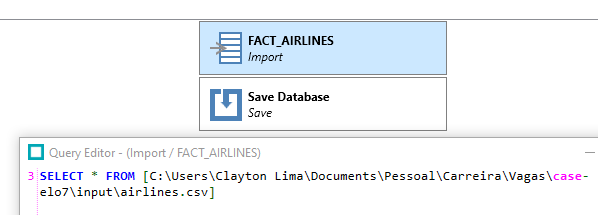

Não fiz tratamentos para subir os dados, apenas os selecionei diretamente do arquivo para gerar um DW.

## DW
O resultado do processamento da ETL é nosso conjunto de dados em formato de DW, onde podemos consultar as informações em SQL e as modelar.

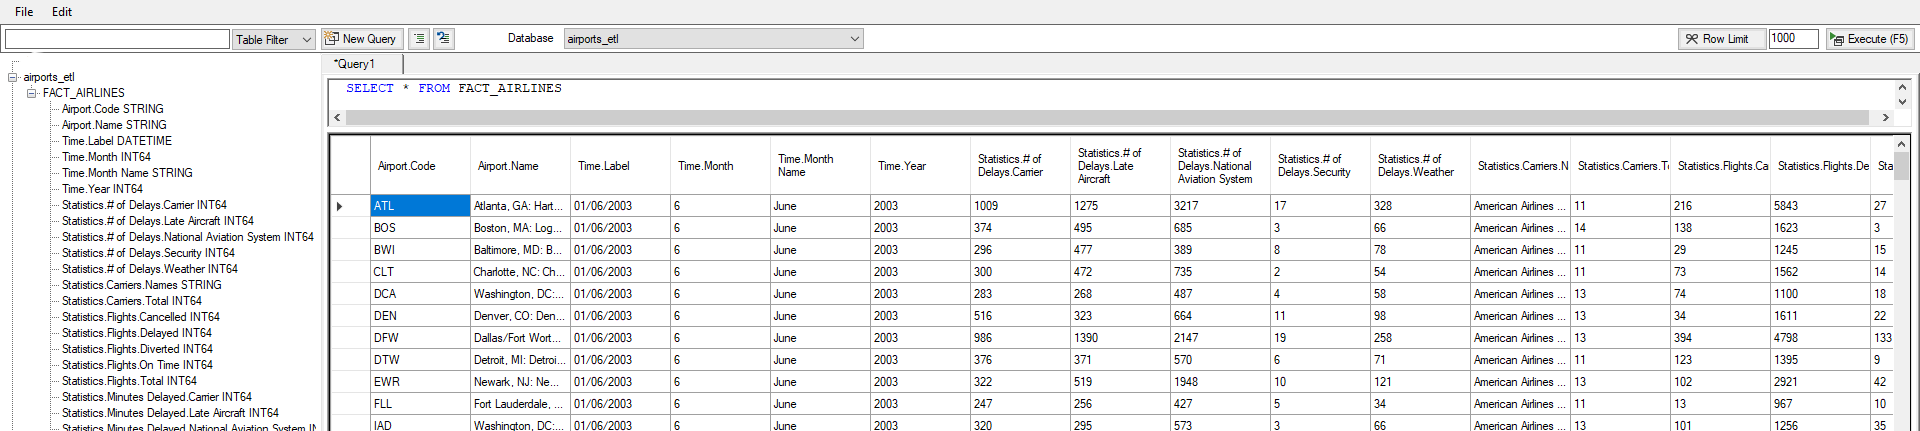

## Dimensões
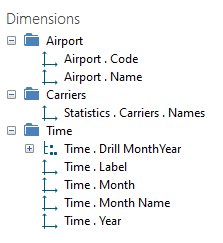
Dimensões extraídas para efetuarmos aberturas em nossos dados e analisarmos os dados.

## Grupo de medidas
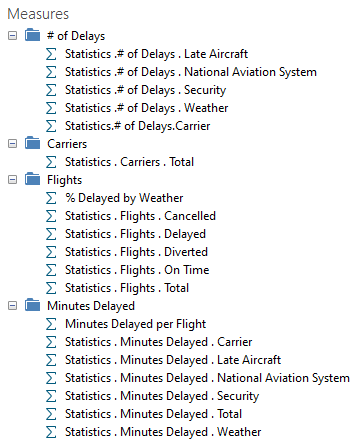
Grupos de medidas e suas respectivas medidas que mensuram as informações do nosso conjunto.

# Perguntas e discussões

Optei por começar respondendo as perguntas objetivamente em python para ter uma ideia de como o conjunto se portaria. Depois de ter uma ideia de sua consistência e distribuição, parti pra modelagem e criação de indicadores que nos apoiassem nas discussões mais subjetivas.

(Todas as imagens utilizadas no notebook estão anexadas e podem ser abertas em outra aba para melhor visualização).

## 1. Faça pelo menos 3 testes de consistência de dados da base e explique os resultados.

### Primeiro teste de consistência

In [4]:
df_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4408 entries, 0 to 4407
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Airport.Code                                         4408 non-null   object
 1   Airport.Name                                         4408 non-null   object
 2   Time.Label                                           4408 non-null   object
 3   Time.Month                                           4408 non-null   int64 
 4   Time.Month Name                                      4408 non-null   object
 5   Time.Year                                            4408 non-null   int64 
 6   Statistics.# of Delays.Carrier                       4408 non-null   int64 
 7   Statistics.# of Delays.Late Aircraft                 4408 non-null   int64 
 8   Statistics.# of Delays.National Aviation System      4408 non-null   int64 
 9

Verificando se temos alguma linha com informação nula no conjunto para tratarmos. E validando se as colunas em estão em seus respectivos formatos (texto, número, etc).

### Segundo teste de consistência

In [5]:
df_airport.describe()

,Time.Month,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.578947,2009.243421,574.632486,789.078947,954.580309,5.575544,78.216878,12.253403,213.558076,2402.000454,27.880898,9254.420826,11897.860254,35021.369782,49410.274955,45077.107985,211.769737,135997.535163,6276.982759
std,3.457890,3.667475,329.616475,561.798420,921.907801,6.007046,75.181726,2.289861,288.873477,1710.947613,36.356399,5337.214211,6861.691876,24327.721037,38750.017050,57636.745683,257.174789,113972.276370,6477.417169
min,1.000000,2003.000000,112.000000,86.000000,61.000000,-1.000000,1.000000,3.000000,3.000000,283.000000,0.000000,2003.000000,2533.000000,6016.000000,5121.000000,2183.000000,0.000000,14752.000000,46.000000
25%,4.000000,2006.000000,358.000000,425.000000,399.000000,2.000000,33.000000,11.000000,58.000000,1298.750000,8.000000,5708.750000,7400.000000,19530.750000,25084.250000,14389.000000,65.000000,65444.750000,2310.750000
50%,7.000000,2009.000000,476.000000,618.500000,667.500000,4.000000,58.000000,12.000000,123.000000,1899.000000,15.000000,7477.000000,9739.500000,27782.000000,37483.000000,25762.000000,141.000000,100711.000000,4298.500000
75%,10.000000,2012.000000,692.000000,959.000000,1166.000000,7.000000,98.000000,14.000000,250.000000,2950.000000,32.000000,10991.500000,13842.500000,41606.000000,59951.250000,50362.000000,274.000000,164294.750000,7846.000000
max,12.000000,2016.000000,3087.000000,4483.000000,9066.000000,94.000000,812.000000,18.000000,3680.000000,13699.000000,442.000000,31468.000000,38241.000000,220796.000000,345456.000000,602479.000000,4949.000000,989367.000000,76770.000000


Dando uma passada geral nas estatísticas básicas das colunas númericas e avaliando se temos algo fora do comum. Um ponto me chamou atenção:
- Verificar Statistics.# of Delays.Security e entender o motivo de termos um valor negativo.


### Terceiro teste de consistência

Analisando as linhas com Statistics.# of Delays.Security menores que 0 levantada acima.
Precisaremos tratar esses dois casos para que não influenciem negativamente quantos formos sumarizar as informações.

In [6]:
df_airport[df_airport['Statistics.# of Delays.Security'] < 0]

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,Statistics.# of Delays.Weather,Statistics.Carriers.Names,Statistics.Carriers.Total,Statistics.Flights.Cancelled,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
115,TPA,"Tampa, FL: Tampa International",2003/09,9,September,2003,135,197,283,-1,11,"American Airlines Inc.,JetBlue Airways,Contine...",11,34,629,0,4535,5198,6378,10114,10231,13,27377,637
1845,MIA,"Miami, FL: Miami International",2008/09,9,September,2008,244,190,370,-1,19,"American Airlines Inc.,Alaska Airlines Inc.,Co...",12,67,827,5,3736,4635,19850,12366,11713,5,45073,1135


### Quarto teste de consistência
Validar se todas as somas de flighs total batem com a soma dos flights individuais.

### Quinto teste de consistência
Validar se todas Statistics.Minutes Delayed.Total corresponde à soma de todos os motivos.

### Solucionando problemas encontrados nos testes

## 2. Dentre os motivos que geram atrasos, qual o principal?

In [7]:
colunas_atraso = ['Statistics.# of Delays.Carrier', 'Statistics.# of Delays.Late Aircraft', 'Statistics.# of Delays.National Aviation System', 'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather']
df_atraso = df_airport[colunas_atraso]
df_atraso.sum().sort_values(ascending=False)

Statistics.# of Delays.National Aviation System    4207790
Statistics.# of Delays.Late Aircraft               3478260
Statistics.# of Delays.Carrier                     2532980
Statistics.# of Delays.Weather                      344780
Statistics.# of Delays.Security                      24577
dtype: int64

Selecionando apenas as colunas de atrasos e as sumarizando podemos ver que o principal motivo de atraso o "National Aviation System" com mais de 4 milhões de atrasos no conjunto.

### Motivos de atraso
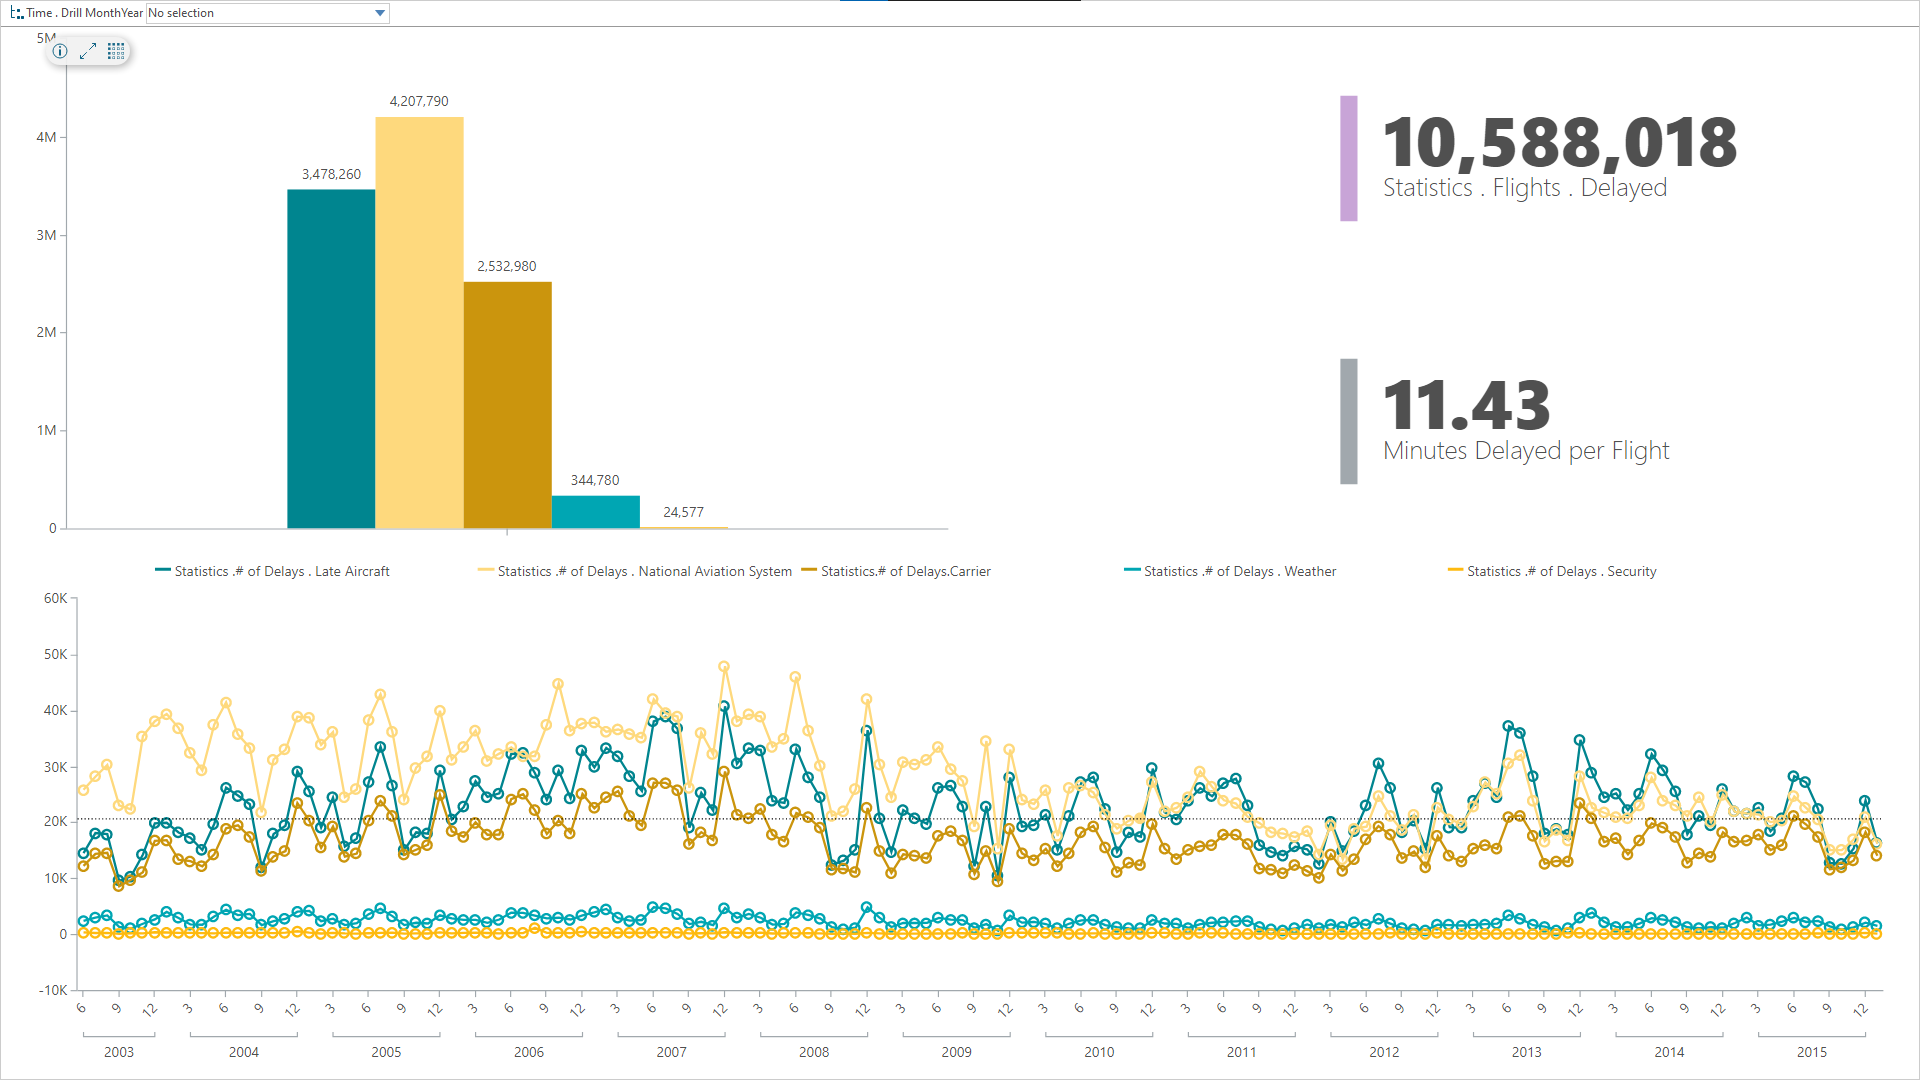

No indicador acima temos exatamente o mesmo filtro que fizemos em python para responder nossa pergunta. Podemos notar que as informações "batem na vírgula". 
Porém, analisando o gráfico inferior, onde temos os motivos abertos pelo período, podemos notar que o motivo que tivemos como principal no conjunto inteiro parece começar a diminuir após o ano de 2010.

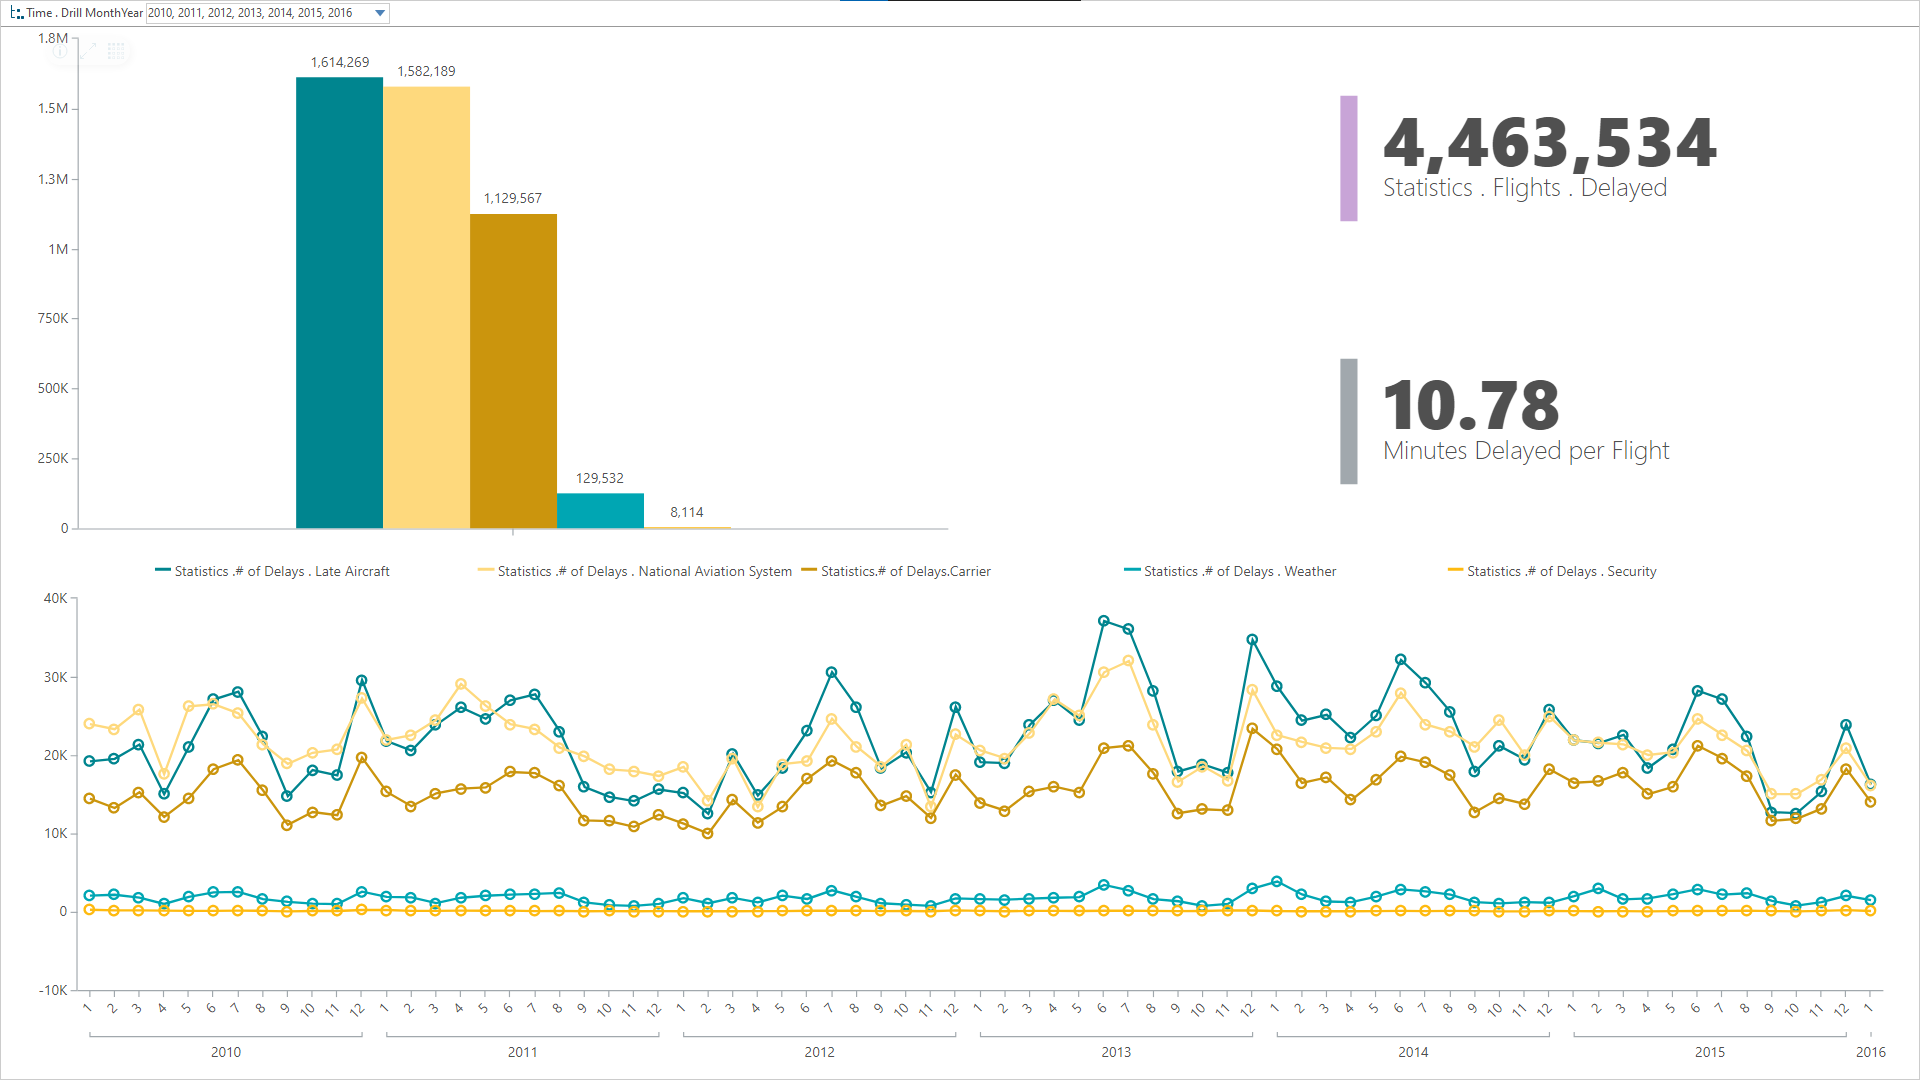

Filtrando a partir do ano de 2010 podemos ver que o motivo "Late Aircraft" começa a tomar a frente no conjunto.

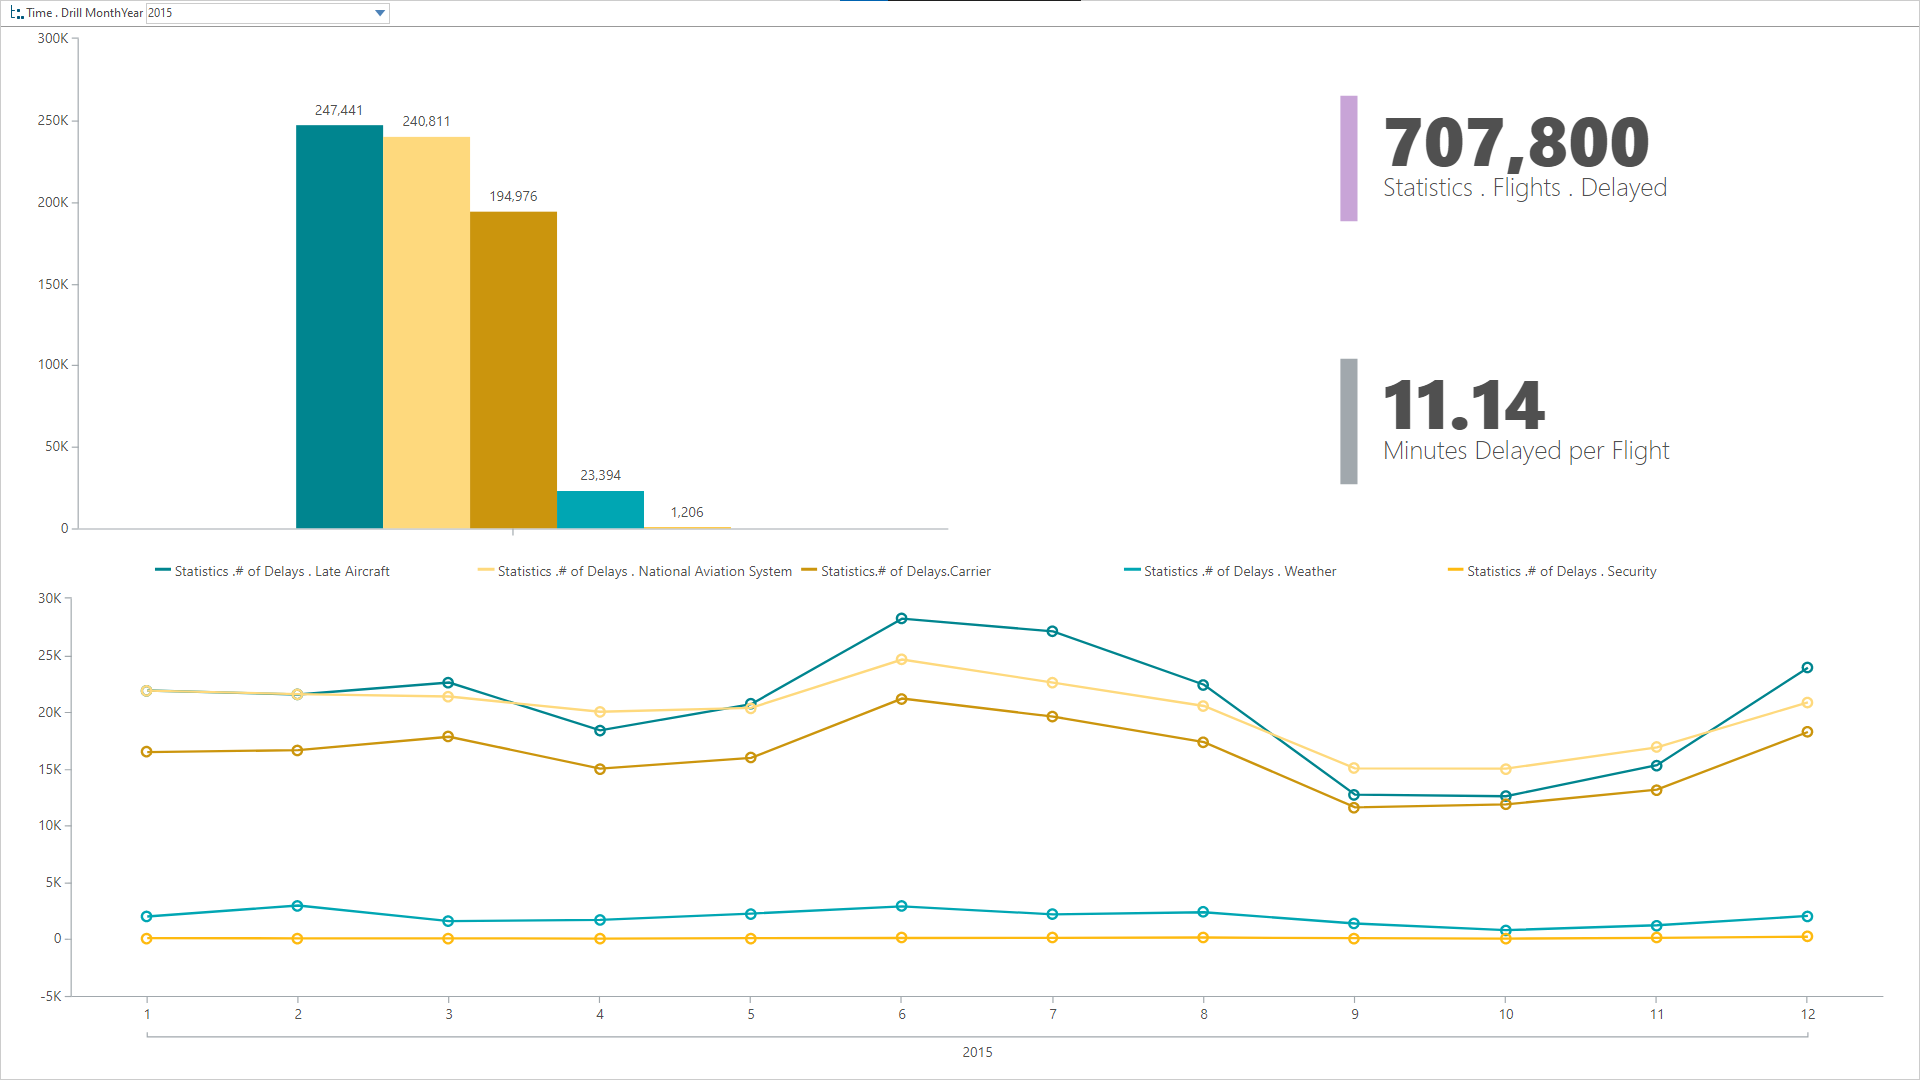

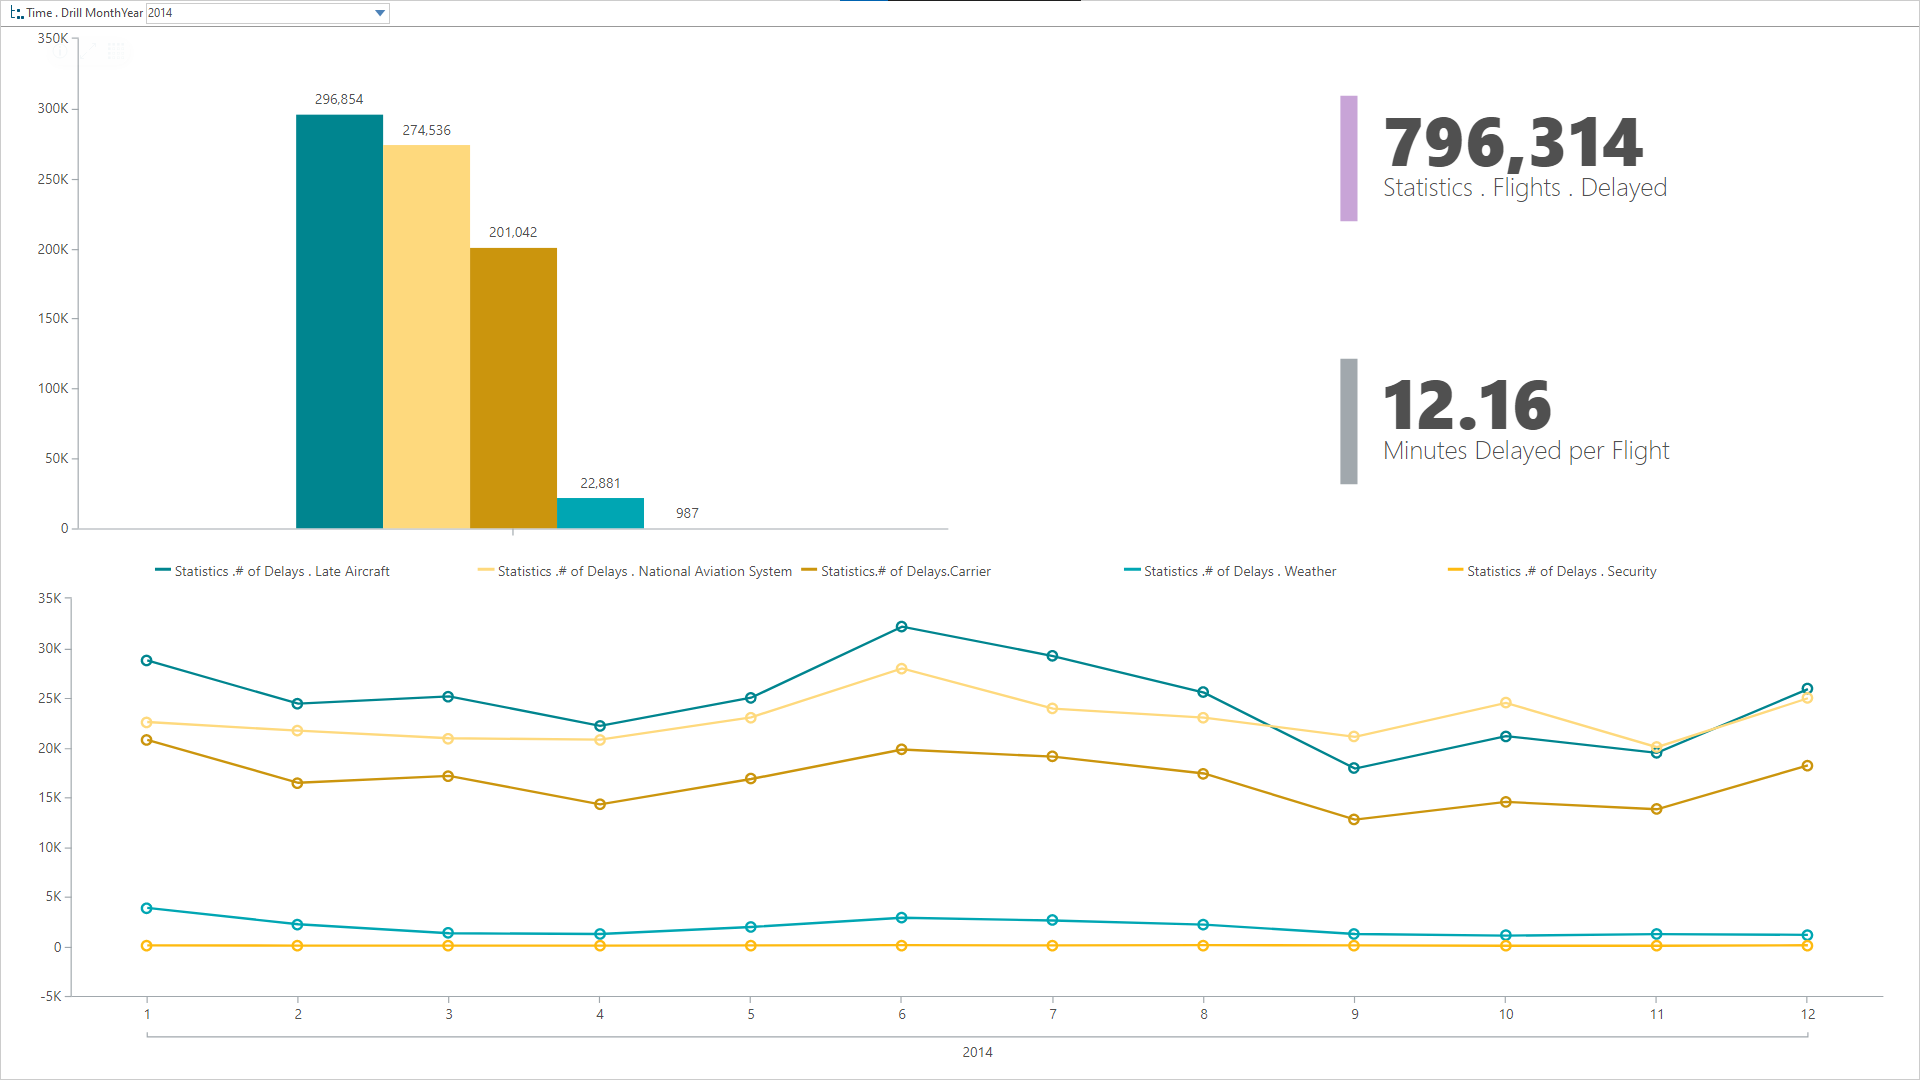

Olhando os dois últimos anos fechados (2014 e 2015), podemos verificar nossa hipótese de que o motivo 'Late Aircraft' tem gerado mais atraso entre todos os motivos do conjunto no período.

## 3. Quais os aeroportos que mais sofrem com as condições climáticas? Este efeito é sazonal?

In [8]:
group_atraso_clima = df_airport.groupby(by=['Airport.Code'])['Statistics.# of Delays.Weather'].sum()
group_atraso_clima.sort_values(ascending=False).head(5)

Airport.Code
ATL    40113
DFW    30476
ORD    24358
LGA    16350
DEN    15556
Name: Statistics.# of Delays.Weather, dtype: int64

Acima temos os cinco aeroportos que, de acordo com a medida 'Statistics.# of Delays.Weather', mais sofreram com atrasos por clima no conjunto de dados, 

In [9]:
group_minutos_clima = df_airport.groupby(by=['Airport.Code'])['Statistics.Minutes Delayed.Weather'].sum()
group_minutos_clima.sort_values(ascending=False).head(5)

Airport.Code
ATL    3209941
DFW    2549836
ORD    2192250
DEN    1240212
IAH    1209686
Name: Statistics.Minutes Delayed.Weather, dtype: int64

E acima temos os aeroportos que mais tiveram atrasos em minutos no conjunto de dados.

### Aeroportos afetados pelo clima
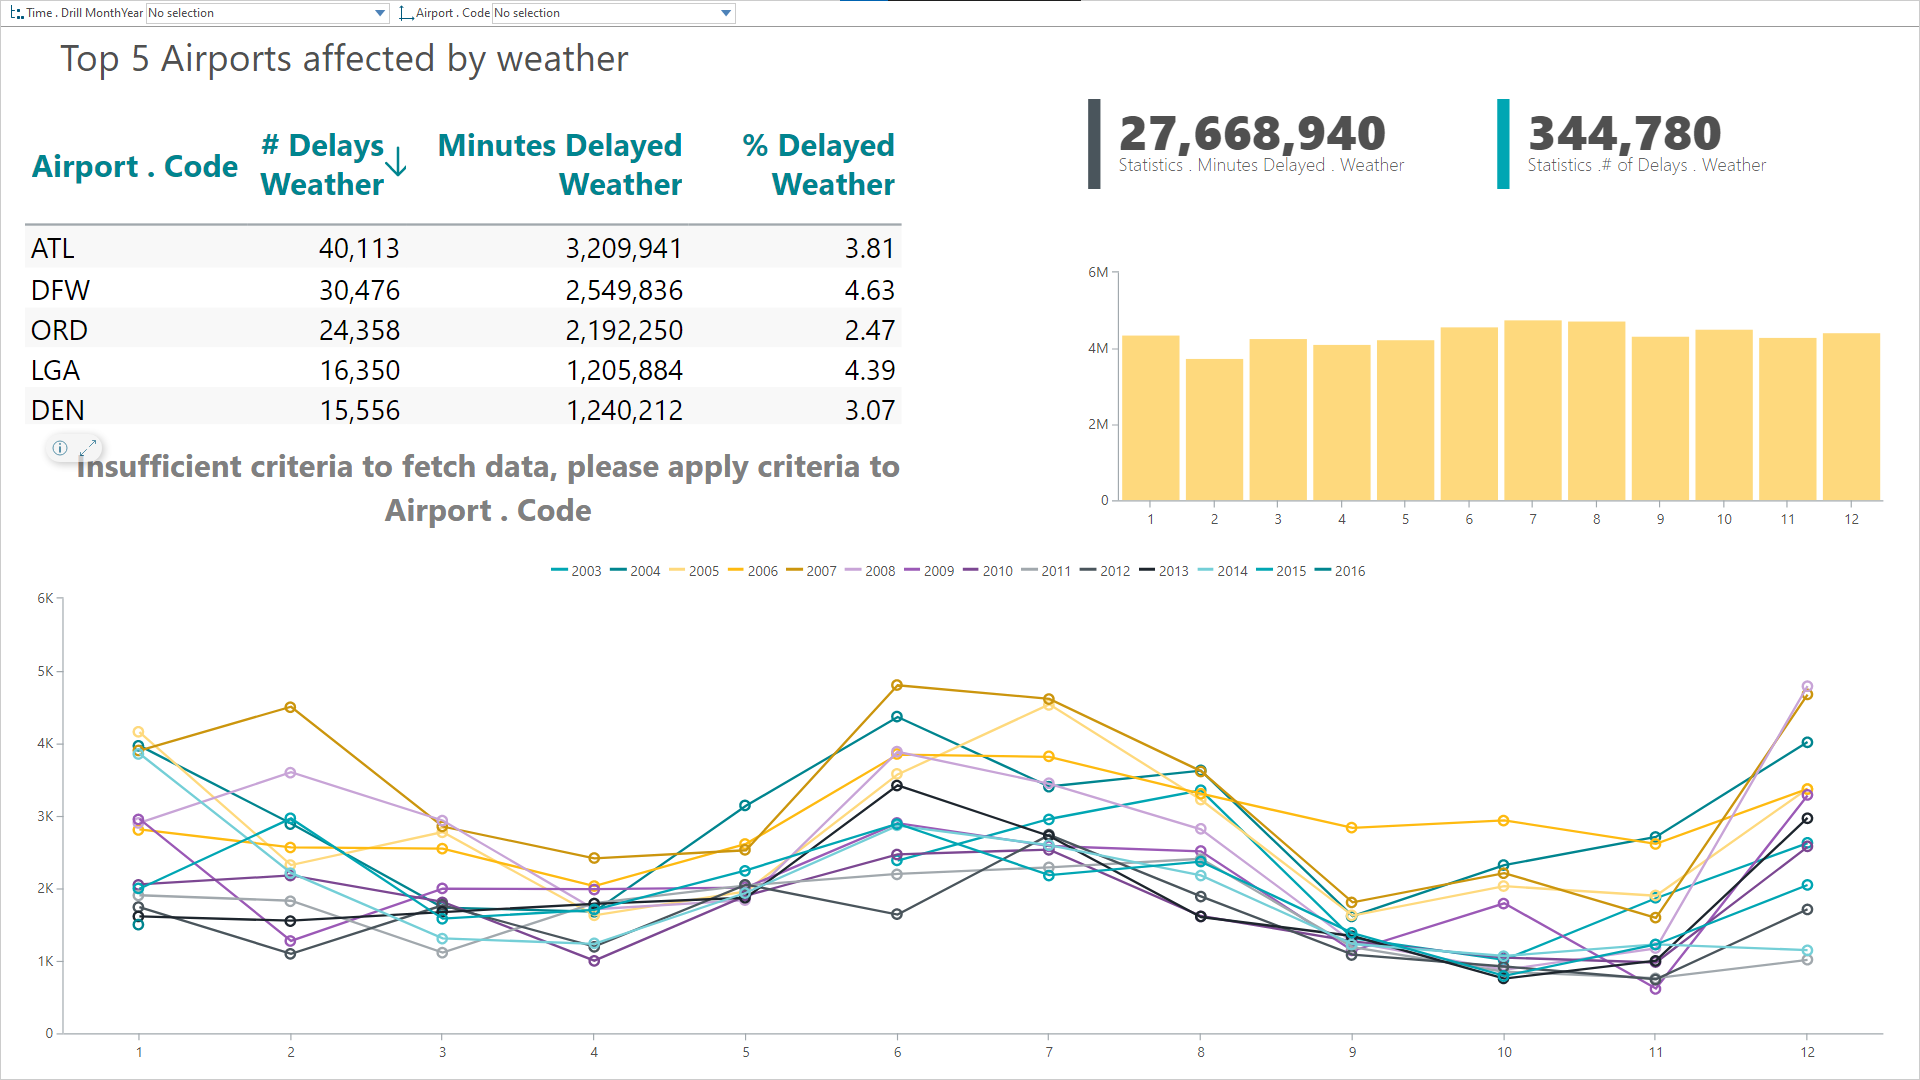
Novamente, temos no indicador acima as informações "batendo na vírgula" com o python. Na tabela podemos ordenar os Top 5 aeroportos por três medidas diferentes. As primeiras duas medidas são as mesmas que temos na análise em python. Porém, na terceira (% Delayed Weather), proponho uma visão diferente do problema.

Partindo do princípio que um aeroporto pode ter um número de grande de problemas climáticos apenas por ser maior que os outros, pensei em também verificarmos quais são os aeroportos que possuem uma maior porcentagem de problemas climáticos comparando entre seus próprios problemas e não só entre aeroportos. Para isso, proponho a seguinte medida.

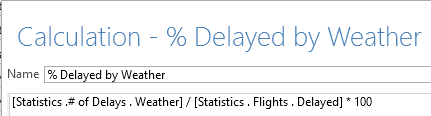

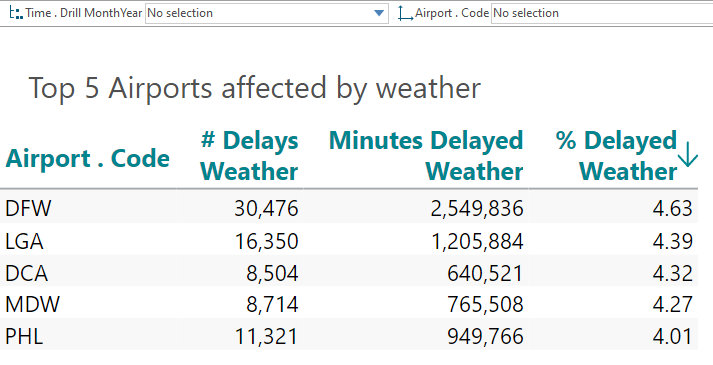
Podemos notar, então, que, dos aeroportos que estamos analisando, não necessariamente aquele que possui maior número de atrasos por clima sofre mais com esse problema do que aeroportos com um menor número de vôos.

### Sazonalidade dos efeitos climáticos
Para a análise da sazonalidade proponho duas abordagens. A primeira pela quantidade de vôos e a segunda pela medida que criamos acima.

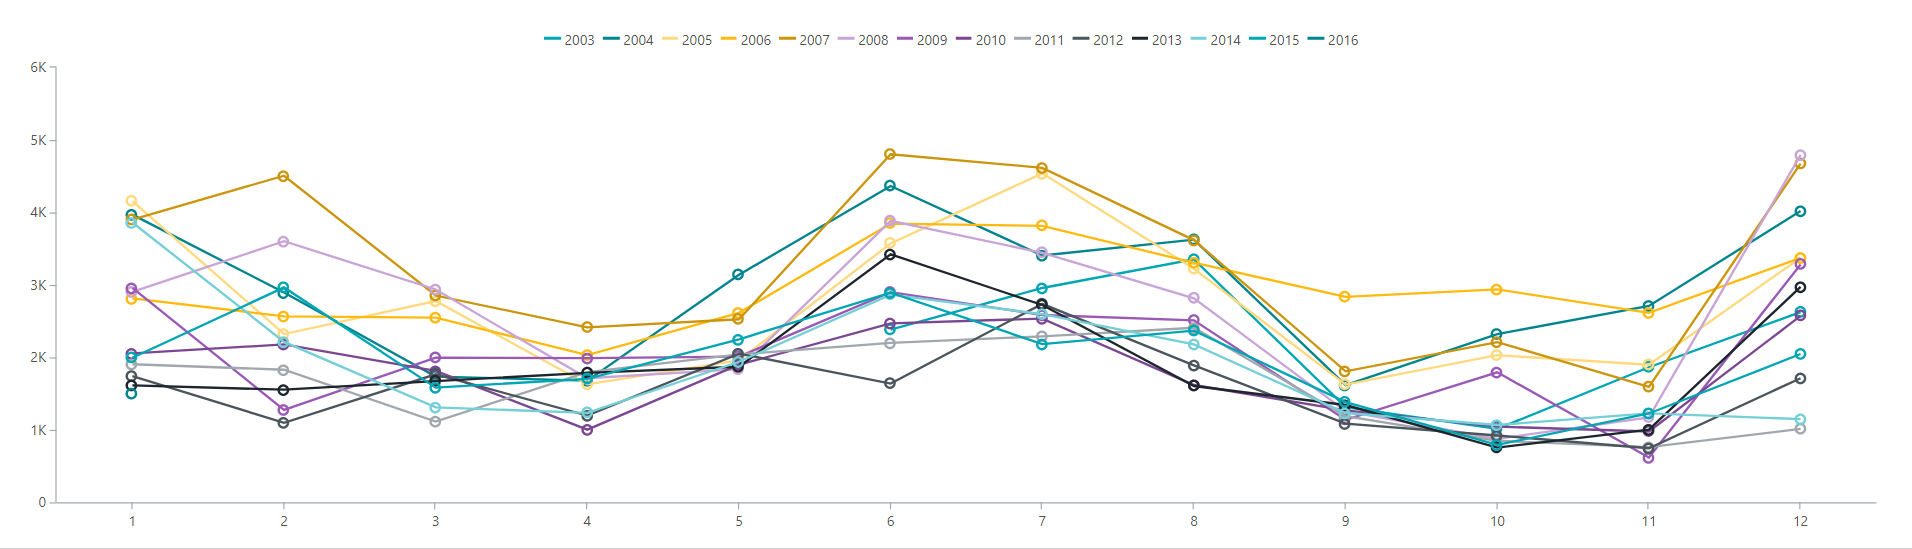
Aqui, destaco o mesmo indicador que vimos acima.

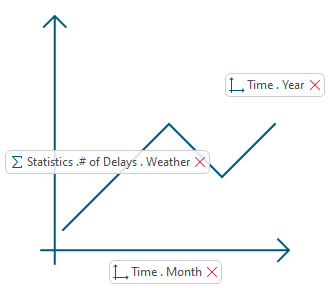
E aqui como ele foi construído para facilitar a validação da sazonalidade dos efeitos climáticos.

Nessa primeira abordagem, olhando todos os aeroportos, podemos notar um efeito sazonal na métrica de números de atraso pelo clima em alguns meses janeiro/fevereiro, junho/julho e em dezembro.

Imaginei que este fenômeno poderia se dar pelo aumento da quantidade geral de voos nestes meses.

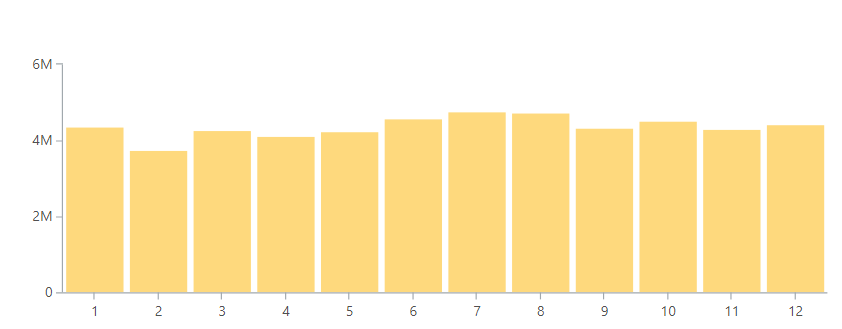
Este indicador mostra a medida de voos totais por cada mês para nos ajudar a identificar se o crescimento do número de atrasos pelo clima está correlacionado ao aumento do número de voos em geral. Não parece ser o caso no nosso conjunto.

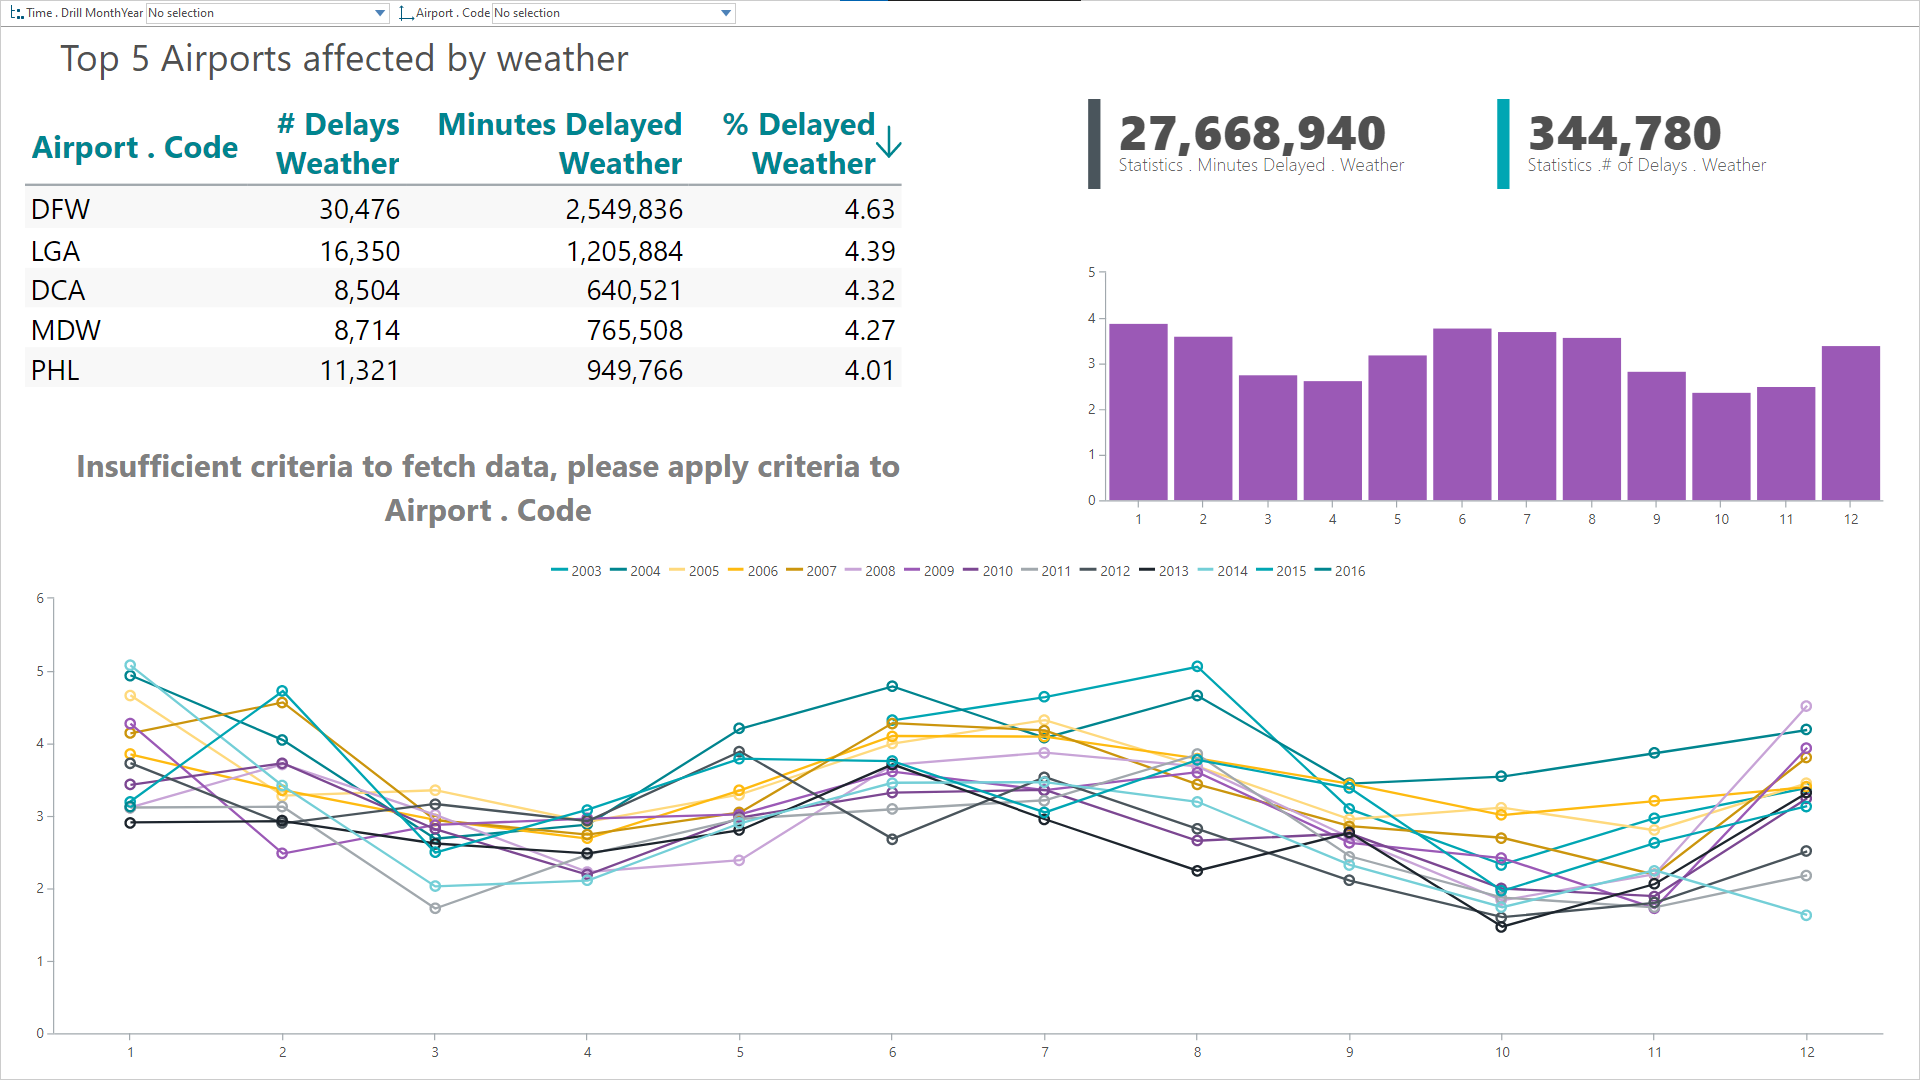
Aqui podemos ver a mesma análise, mas com a medida que criamos de % atrasos pelo clima. 

Podemos ver que os mesmos meses se destacam, portando há sazonalidade 

## 4. Qual o pior ano (da base) em termos de atrasos? Dentre os motivos geradores de atrasos, houve algum que se destacou?

In [10]:
group_flights_year = df_airport.groupby(by=['Time.Year'])['Statistics.Flights.Delayed'].sum()
group_flights_year.sort_values(ascending=False).head(5)

Time.Year
2007    1129439
2006    1024612
2008     965136
2005     925578
2004     880677
Name: Statistics.Flights.Delayed, dtype: int64

Acima temos a medida 'Statistics.Flights.Delayed' agrupada pela dimensão 'Time.Year', ordenada de forma decrescente e pegando os 5 maiores valores. Temos, portanto, os cinco piores anos da base em termos de atraso, olhando esta medida.

In [14]:
df_airport.groupby(by=['Time.Year'])['Statistics.Minutes Delayed.Total'].sum().sort_values(ascending=False).head(5)

Time.Year
2007    64942741
2006    56997528
2008    56598187
2005    50060286
2013    47098086
Name: Statistics.Minutes Delayed.Total, dtype: int64

Acima temos a medida 'Statistics.Minutes Delayed.Total' agrupada pela dimensão 'Time.Year', ordenada de forma decrescente e pegando os 5 maiores valores. Temos, portanto, os cinco piores anos da base em termos de atraso, olhando esta medida.

<AxesSubplot:xlabel='Time.Year'>

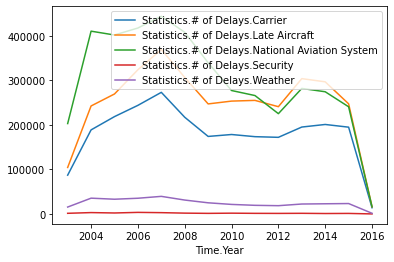

In [30]:
df_airport.groupby(by=['Time.Year'])[colunas_atraso].sum().plot()

No gráfico acima, podemos ver que no ano de 2007, onde temos o maior número de atrasos, olhando pelas quantidades de atraso, o motivo 'National Aviation System' se distância levemente do segundo motivo 'Late Aircarft'.

<AxesSubplot:xlabel='Time.Year'>

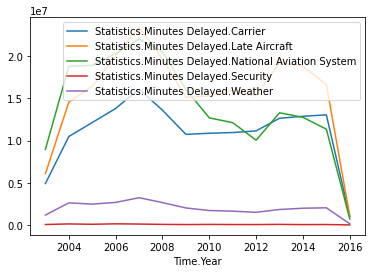

In [32]:
colunas_minuto = ['Statistics.Minutes Delayed.Carrier', 'Statistics.Minutes Delayed.Late Aircraft', 'Statistics.Minutes Delayed.National Aviation System', 'Statistics.Minutes Delayed.Security', 'Statistics.Minutes Delayed.Weather']
df_airport.groupby(by=['Time.Year'])[colunas_minuto].sum().plot()

Já no gráfico acima, também olhando o ano de 2007, mas, desta vez, olhando pela quantidade de minutos atrasados, podemos ver o motivo 'Late Aircraft' se sobresai ao motivo 'National Aviation System'.

Por estas duas análises, podemos enterder então que, dependendo da variável que vermos como mais importante, podemos ter ou não um motivo destaque gerador de atraso. Considerei a quantidade de atrasos mais importante para as próximas análises.

### Anos por atraso e seus respectivos motivos

Para o acompanhemento contínuo desta nossa questão, proponho o seguinte indicador e suas possíveis interpretações. Lembrando que optei por considerar a variável quatidade de atrasos mais importantes do que quantidade de minutos atrasados. O mesmo indicador é possível ser criado para esta medida também.

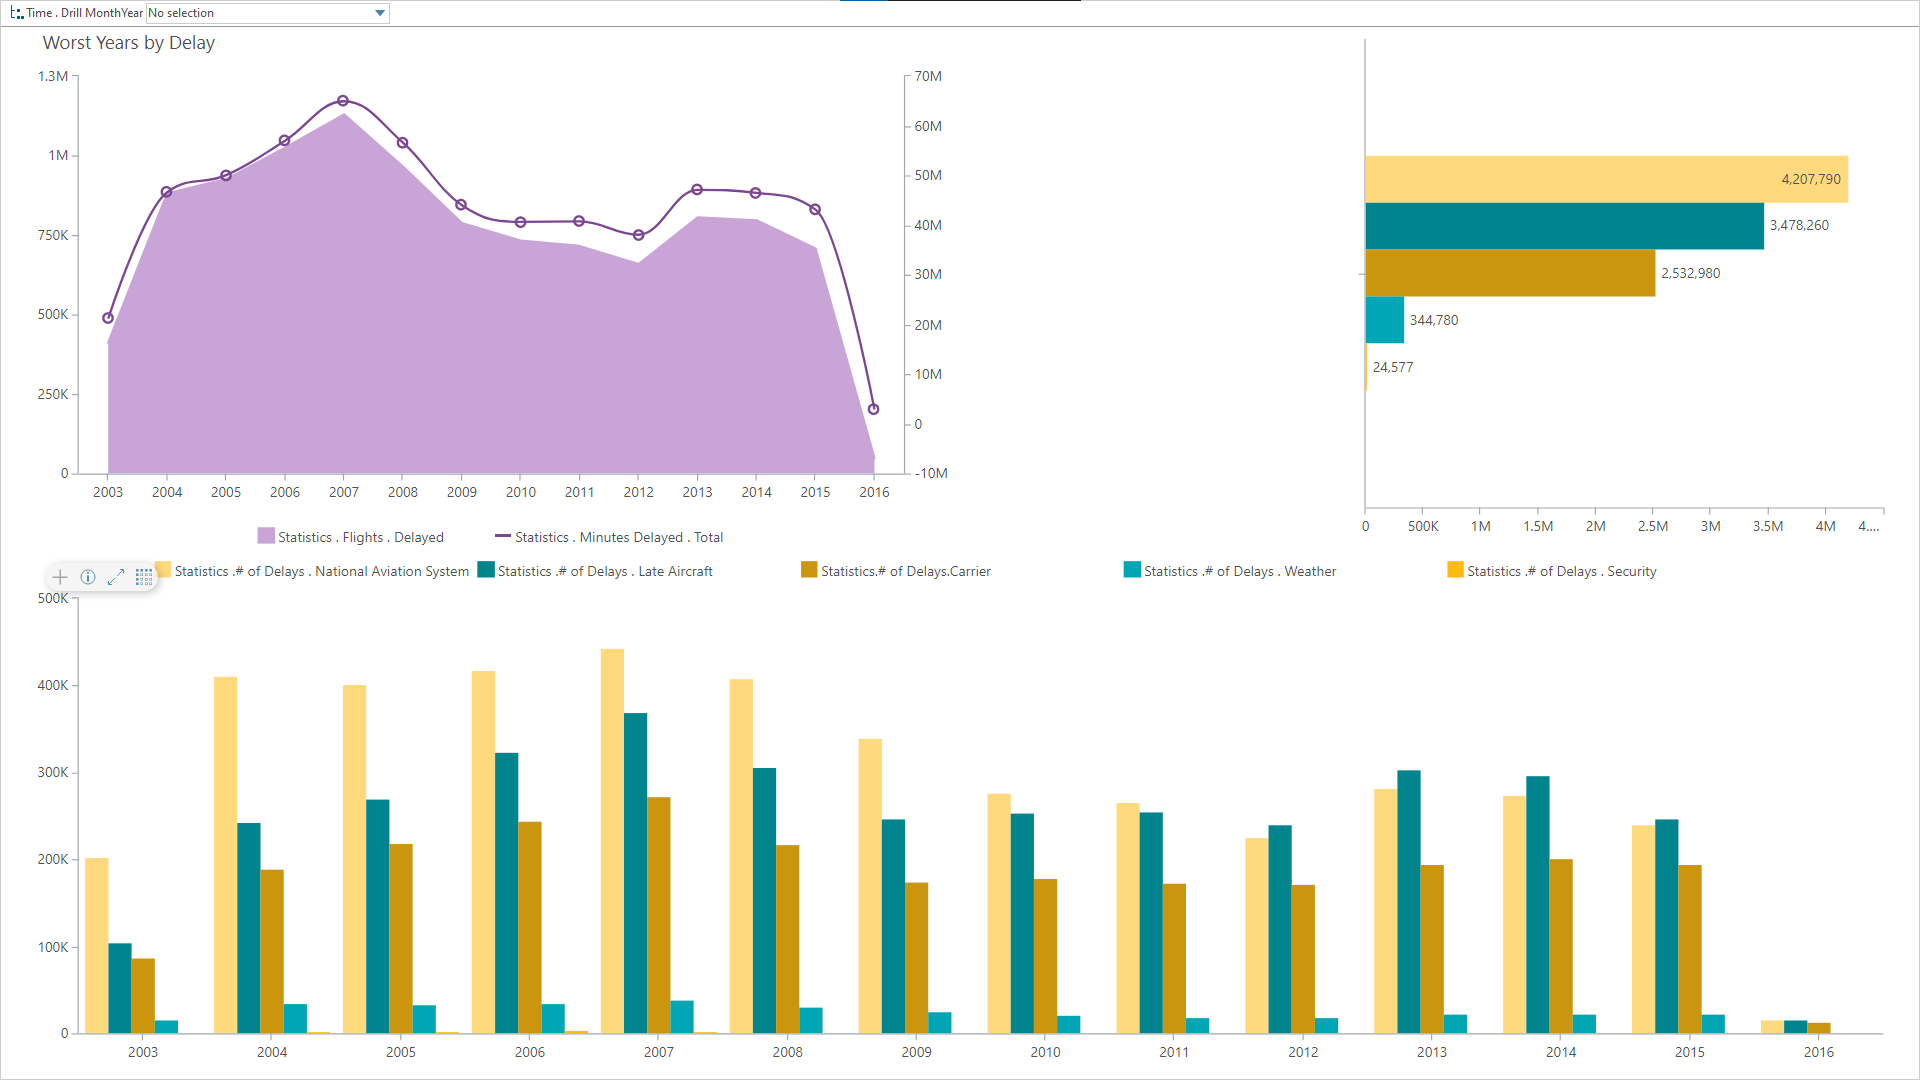
Cada indicador aqui nos ajuda a responder parte da nossa pergunta e acompanhar mudanças para atuarmos com agilidade.

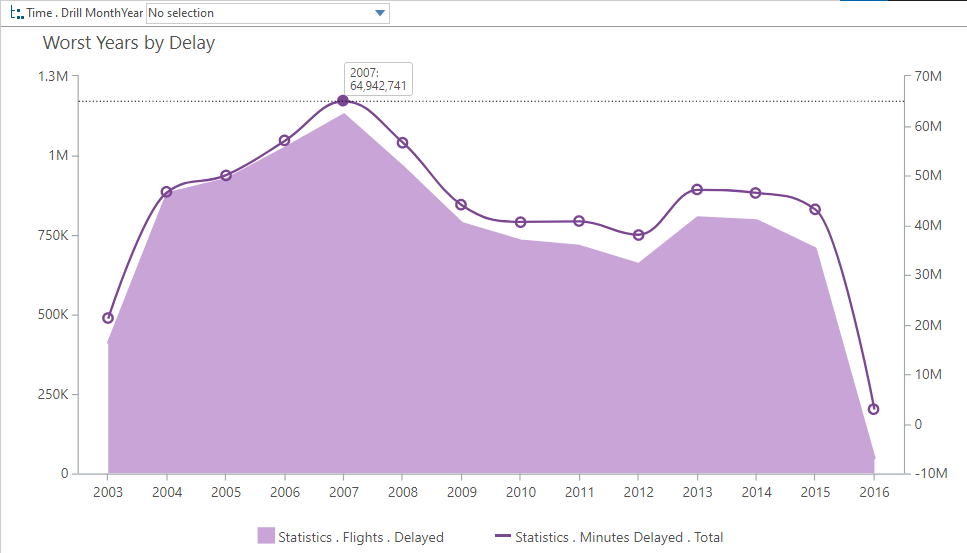
Na diagonal superior esquerda temos o indicador que nos mostra nossas duas principais de atraso. 'Statistics. Flights. Delayed' em um gráfico de área com seu eixo representado à esquerda e 'Statistics. Minutes. Delayed. Total' como um gráfico spline com seu eixo representado à direita.

Podemos ver que o ano de 2007 realmente se destaca dos demais em ambas as métricas de atraso.

Também podemos notar que, apesar as métricas serem altamente correlacionadas, de 2010 pra 2011 tivemos um pequeno "desgarramento", onde o número de voos atrasados diminuiram, mas a quantidade de minutos ainda subiu. A correlação entre as métricas parece se manter nos próximos anos, mas como essa leve diferença ganha em 2010.

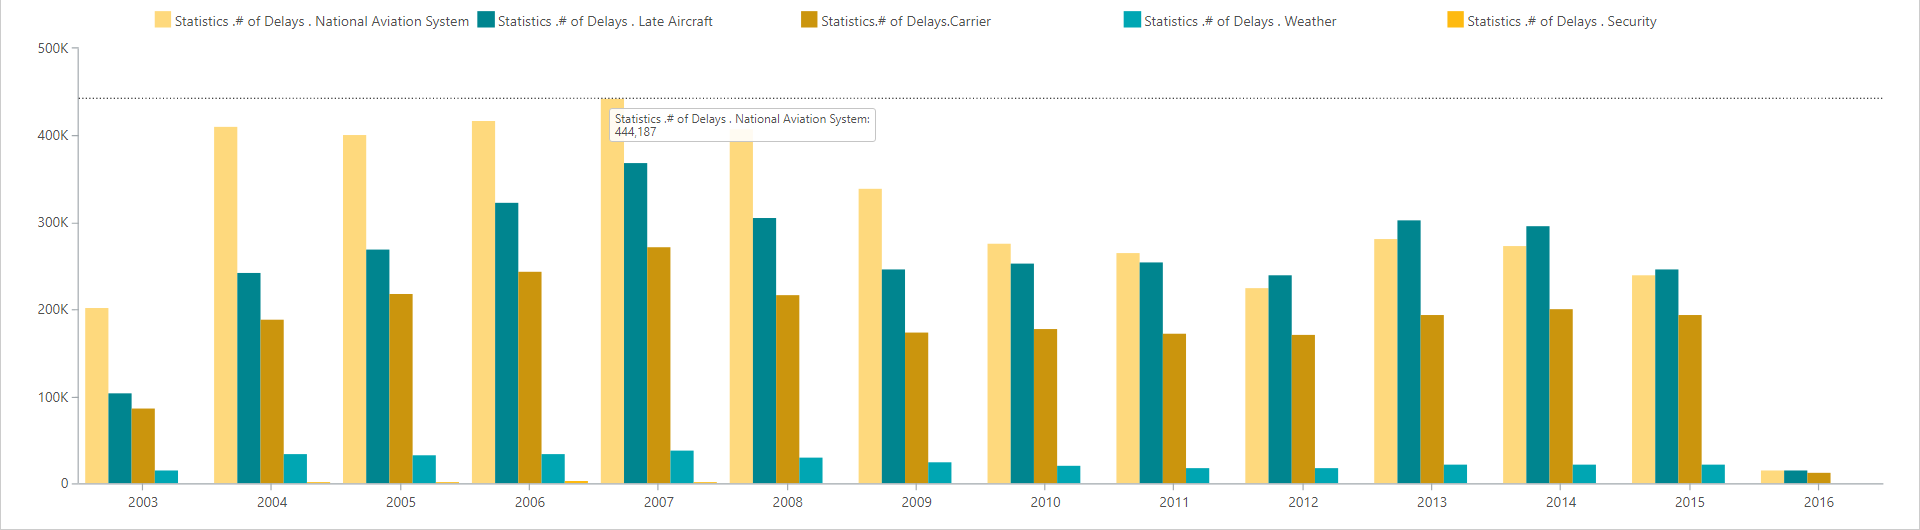
Aqui apresento um acompanhemento dos motivos onde mais tivemos atrasos pelos anos, olhando as medidas de números de atrasos.

Como podemos perceber, o principal motivo de atraso desde o começo da base é o 'National Aviation System'. Porém, a partir de seu pico em 2007, ele começa a cair consideravelmente até ser passado, em 2013, pelo motivo 'Late Aircraft'.

## 5. Devido ao tipo de operação das companhias aéreas, quando há atraso em um voo, isso acaba impactando os voos seguintes.

(Na pergunta 5, entende-se que a base não dispõe dos dados necessários para análise. É pedido então um exercício de definir que dados seriam necessários para analisar o que foi pedido.)

Para responder a esta questão, proponho a seguinte abordagem. Assim como para as questões anteriores, modelei as informações de forma que nos ajudassem a visualizar e monitorar nossos pontos de forma rápida, automatizada e assertiva.

### Inputs

Comecei criando bases no mesmo formato CSV com chaves, dimensões, medidas e algumas informações que nos ajudassem na modelagem futuras das informações. Começando pela tabela de voos.

#### Fato_Voos
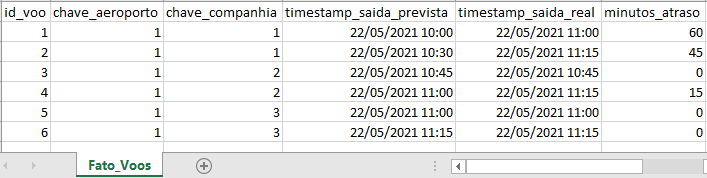

Para esta tabela, criei as seguintes informações:
- chave id_voo para identificarmos os voos com facilidade;
- chave_aeroporto como chave secundária para ligar na dim_aeroport;
- chave_companhia como chave secundária para ligar na dim_companhia;
- timestamp_saida_prevista para a hora exata prevista da saída de cada vôo;
- timestamp_saida_real para a hora exata real da saída de cada vôo;
- minutos_atraso representa a diferença entre a saída real e saída prevista do vôo.

#### Dim_Aeroporto
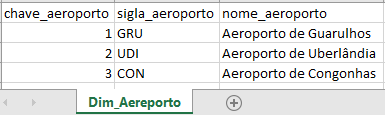
Já para esta tabela, crirei as seguintes informações:
- chave_aeroporto como chave primária para ligarmos na Fato_Voos
- sigla_aeroporto com a sigla do respectivo aeroporto
- nome_aeroporto para o nome do respectivo aeroporto

#### Dim_Companhia
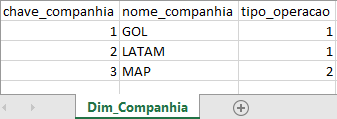

Aqui, criei as seguintes informações:
- chave_companhia como chave primária para ligarmos na Fato_Voos;
- nome_companhia com nome da companhia em questão;
- tipo_operacao para identificarmos o tipo da operação daquela companhia aérea.

### Modelagem dos dados
A seguir apresento a proposta de modelagem destes dados, passando pela ETL, relacionamentos, dimensões, medida criada e como podem nos ajudar a acompanhar potenciais atrasos no dia.

#### ETL
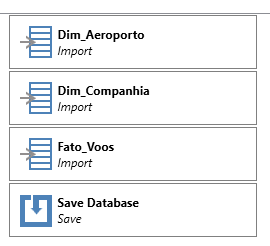
Em nossa ETL temos os imports das nossas bases CSV para a geração do DW, possibilitando modelaremos nossas informações.

#### Relacionamentos
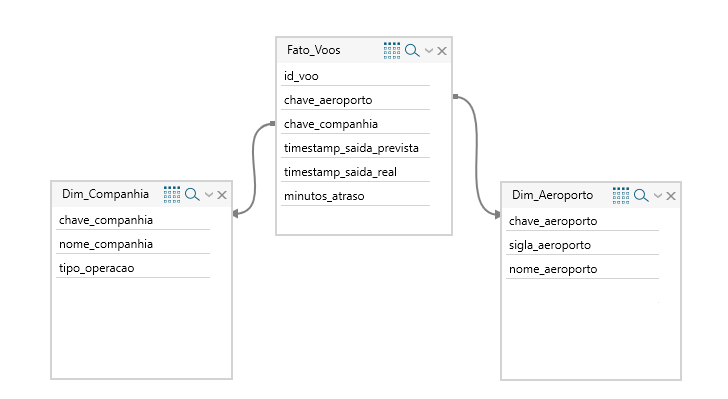
Este tipo de relacionamento, conhecido como esquema em estrela, nos permite fazer aberturas com as tabelas chamadas de dimensão (dim) sem precisarmos criar medidas para cada abertura.

#### Grupo de medida e dimensões
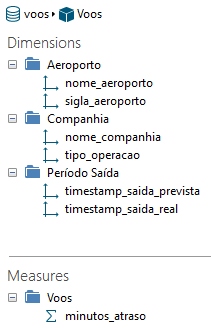

Partindo desta modelagem, proponho as seguintes ideias de indicadores para acompanharmos os atrasos acumulados entre voos.

Podemos começar filtrando voos do mesmo aeroporto e mesma companhia, ordenando pelos campos de timestap de saída prevista e real para analisarmos o quanto cada atraso anterior afeta o próximo voo da mesma companhia.

E podemos, também, fazer a mesma análise, mas desta vez sem filtrar companhia, para tentarmos mensurar o quanto voos atrasos de companhias diferentes, mas de operações iguais, podem afetar voos futuros.